In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
market_datas=pd.read_csv('data/SNP.csv')

In [3]:
market_datas.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,21.99,1.0,0.005616,0.0275,0.3434,0.0088,22.6
1,21.99,5.0,0.005616,0.0275,0.3434,0.0088,12.1
2,21.99,7.0,0.005616,0.0275,0.3434,0.0088,11.0
3,21.99,9.0,0.005616,0.0275,0.3434,0.0088,11.1
4,21.99,10.0,0.005616,0.0275,0.3434,0.0088,12.6


In [4]:
def mertonJumpDiffusion(T = 1,S0 = 1,K = 1.1,r = 0.05,q=0.02,sigma = 0.4):
    # Market parameters
    #     T = 1      # maturity
    #     S0 = 1     # spot price
    #     K = 1.1    # strike price
    #     r = 0.05   # risk-free interest rate
    #     q = 0.02   # dividend rate

    # Model parameter
    # sigma = 0.4 # volatility

    # Model parameters of the jump part (NCPP)
    mu_j = -0.1
    sigma_j = 0.15
    lmbda = 0.5

    # Risk-neutral measure
    muRN = r-q-0.5*sigma**2 - lmbda*(np.exp(mu_j+0.5*sigma_j**2)-1) # drift

    # Monte Carlo parameters; npaths = nblocks*nsample
    nblocks = 20000 # number of blocks
    nsample = 10000 # number of samples per block

    # Initialize arrays
    Vc_list = np.zeros(nblocks) # call array

    # Monte Carlo
    for i in range(nblocks):
        A = muRN*T + sigma*np.sqrt(T) * np.random.normal(size=(1, nsample))
        N = np.random.poisson(lmbda, size=(1, nsample))
        J = mu_j* N + sigma_j * np.sqrt(N) * np.random.normal(size=(1, nsample))
        X = A+J
        S = S0*np.exp(X)
        Vc_list[i] = np.exp(-r*T)*np.mean(np.maximum(S - K, 0))

    # Final call values
    Vc = np.mean(Vc_list)

    return round(Vc, 4)

In [10]:
result = []
for i in range(200):
    print("iteration: " + str(i))
    T = market_datas['Maturity'][i]
    S0 = market_datas['Stock Price'][i]
    K = market_datas['Strike Price'][i]
    r = market_datas['Risk-free'][i]
    q = market_datas['Dividends'][i]
    sigma = market_datas['Volatility'][i]
    result.append(mertonJumpDiffusion(T,S0,K,r,q,sigma))

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [13]:
actual = market_datas['Call Price'].head(200)

Text(0, 0.5, 'Calculated option prices')

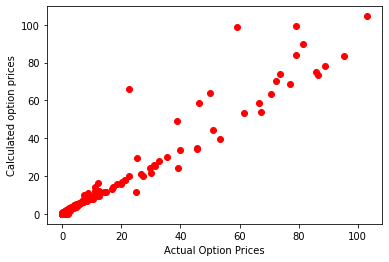

In [14]:
plt.scatter(actual,result,c='r')
plt.xlabel('Actual Option Prices')
plt.ylabel('Calculated option prices')

In [7]:
df = pd.DataFrame({'Pred':result,'Actual':actual},columns=['Pred','Actual'])

In [8]:
df

,Pred,Actual
0,20.0775,22.60
1,16.0778,12.10
2,14.0778,11.00
3,12.0783,11.10
4,11.0789,12.60
5,10.0805,8.60
6,9.0834,9.80
7,8.0897,9.60
8,7.1020,7.60
9,6.1248,6.50


In [9]:
K = market_datas['Strike Price'].head(20)
market_prices = market_datas['Call Price'].head(20)
jdm_prices = result

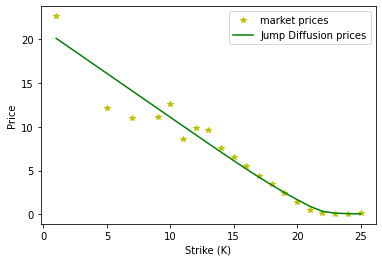

In [10]:
plt.plot(K, market_prices, 'y*',label='market prices')
plt.plot(K, jdm_prices, 'g',label='Jump Diffusion prices')
plt.xlabel('Strike (K)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
len(market_datas)

57516

### NIFTY50 data

In [37]:
data = pd.read_csv('optiondata.csv')

In [38]:
data

,Unnamed: 0,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,123,NIFTY,13-Feb-2019,04-Apr-2019,CE,12400,0.00,0.0,0.0,5.05,0.0,1.20,0,0.00,0.00,0,0,10793.65
1,124,NIFTY,13-Feb-2019,04-Apr-2019,CE,9350,0.00,0.0,0.0,1578.35,0.0,1538.45,0,0.00,0.00,0,0,10793.65
2,125,NIFTY,13-Feb-2019,04-Apr-2019,CE,12150,0.00,0.0,0.0,12.60,0.0,3.75,0,0.00,0.00,0,0,10793.65
3,126,NIFTY,13-Feb-2019,04-Apr-2019,CE,12200,0.00,0.0,0.0,10.60,0.0,3.05,0,0.00,0.00,0,0,10793.65
4,127,NIFTY,13-Feb-2019,04-Apr-2019,CE,12250,0.00,0.0,0.0,8.85,0.0,2.40,0,0.00,0.00,0,0,10793.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24247,41778,NIFTY,26-Aug-2021,02-Sep-2021,CE,15100,0.00,0.0,0.0,1050.50,0.0,1547.70,0,0.00,0.00,0,0,16636.90
24248,41779,NIFTY,26-Aug-2021,02-Sep-2021,CE,15150,0.00,0.0,0.0,1018.95,0.0,1497.85,0,0.00,0.00,0,0,16636.90
24249,41780,NIFTY,26-Aug-2021,02-Sep-2021,CE,15200,1416.00,1418.0,1415.0,1418.00,1418.0,1448.00,3,24.92,2.12,1700,150,16636.90
24250,41781,NIFTY,26-Aug-2021,02-Sep-2021,CE,14950,0.00,0.0,0.0,1148.45,0.0,1697.45,0,0.00,0.00,0,0,16636.90


In [39]:
data.rename(columns = {'Underlying Value':'Stock Price'}, inplace = True)

In [40]:
data[['Stock Price', 'Strike Price']]

,Stock Price,Strike Price
0,10793.65,12400
1,10793.65,9350
2,10793.65,12150
3,10793.65,12200
4,10793.65,12250
...,...,...
24247,16636.90,15100
24248,16636.90,15150
24249,16636.90,15200
24250,16636.90,14950


In [41]:
snp = pd.read_csv('data/SNP.csv')

In [43]:
snp['Stock Price'][:len(data)] = data['Stock Price']
snp['Strike Price'][:len(data)] = data['Strike Price']

In [44]:
nifty50

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,10793.65,12400.0,0.005616,0.0275,0.3434,0.0088,22.6
1,10793.65,9350.0,0.005616,0.0275,0.3434,0.0088,12.1
2,10793.65,12150.0,0.005616,0.0275,0.3434,0.0088,11.0
3,10793.65,12200.0,0.005616,0.0275,0.3434,0.0088,11.1
4,10793.65,12250.0,0.005616,0.0275,0.3434,0.0088,12.6
...,...,...,...,...,...,...,...
57511,50.09,50.0,2.170813,0.0410,0.3211,0.0088,8.8
57512,50.09,52.5,2.170813,0.0410,0.3211,0.0088,7.5
57513,50.09,55.0,2.170813,0.0410,0.3211,0.0088,7.0
57514,50.09,60.0,2.170813,0.0410,0.3211,0.0088,5.8


In [45]:
snp.to_csv('niftydata.csv')

In [31]:
market_datas = data

In [32]:
result_real = []
for i in range(20):
    print("iteration: " + str(i))
    T = market_datas['Maturity'][i]
    S0 = market_datas['Stock Price'][i]
    K = market_datas['Strike Price'][i]
    r = market_datas['Risk-free'][i]
    q = market_datas['Dividends'][i]
    sigma = market_datas['Volatility'][i]
    result_real.append(mertonJumpDiffusion(T,S0,K,r,q,sigma))

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19


In [33]:
market_datas['Call Price'][:20]

0     0.001823
1     0.001294
2     0.000905
3     0.000910
4     0.001029
5     0.000699
6     0.000794
7     0.000803
8     0.000633
9     0.000539
10    0.000455
11    0.000376
12    0.000298
13    0.000203
14    0.000122
15    0.000042
16    0.000009
17    0.000004
18    0.000004
19    0.000009
Name: Call Price, dtype: float64

In [34]:
market_datas

,Unnamed: 0,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,0,0.870456,1.0,0.005616,0.0275,0.3434,0.0088,0.001823
1,1,1.154401,1.0,0.005616,0.0275,0.3434,0.0088,0.001294
2,2,0.888366,1.0,0.005616,0.0275,0.3434,0.0088,0.000905
3,3,0.884725,1.0,0.005616,0.0275,0.3434,0.0088,0.000910
4,4,0.881114,1.0,0.005616,0.0275,0.3434,0.0088,0.001029
...,...,...,...,...,...,...,...,...
24247,24247,1.101781,1.0,0.082086,0.0000,0.3116,0.0088,0.032093
24248,24248,1.098145,1.0,0.082086,0.0000,0.3116,0.0088,0.030904
24249,24249,1.094533,1.0,0.082086,0.0000,0.3116,0.0088,0.032336
24250,24250,1.112836,1.0,0.082086,0.0000,0.3116,0.0088,0.031686


In [35]:
K = market_datas['Strike Price'].head(20)
market_prices = market_datas['Call Price'].head(20)
jdm_prices = result_real

No handles with labels found to put in legend.


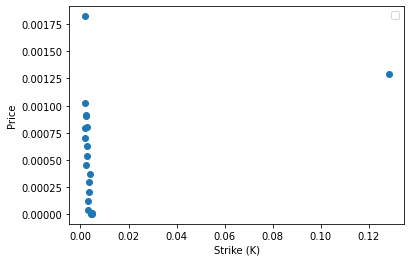

In [36]:
plt.scatter(jdm_prices, market_prices)
# plt.plot(K, jdm_prices, 'g',label='Jump Diffusion prices')
plt.xlabel('Strike (K)')
plt.ylabel('Price')
plt.legend()
plt.show()